<a href="https://colab.research.google.com/github/marianqian/Intro-to-ML-and-DL-Using-fast.ai/blob/master/notebooks/Lesson_5_Train_and_Finetune_Models_using_fast_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the AI Academy! This is the fifth lesson, focused on learning how to use the fast.ai library to build actual neural network models for collaborative filtering and tabular data. We used [fastai](https://www.fast.ai/) in the lesson 4 Google Colab notebook, so please make sure you understand how the data was loaded and processed because we will be building upon that in this notebook.

You can learn more about fastai [here](https://docs.fast.ai/); the library is split between four different parts, which are vision, text, tabular, and collab models. fastai focuses on neural networks, and for the rest of the course we will be exploring how to use this library. 

The creater of fastai, Jeremy Howard, also taught a course explaining how to use the library and introduces deep learning to those who have no experience with it before. We highly recommend you to look at his videos linked [here](https://course.fast.ai/videos/?lesson=1) when you have the time. 

NOTE: Educational use and distribution is permitted, but credit and attribution to AIM Academy is required. 

#Learning Objectives: 
* Understand how to use learners in fast.ai for collaborative filtering and tabular data 
* Be able to find and change the learning rate of a model 
* Understand how collaborative filtering works
* Understand what tabular data is 


#Collaborative filtering
As explained in the previous notebook, the goal of collaborative filtering is to predict how much someone would like an item given previous data about other items. 

Using the `fastai.collab` section of the `fastai` library, we will predict how much someone would like a movie given their previous ratings of movies on a scale from 0 to 5. 

The following code block will load in the data to a `Databunch`(the same from the previous notebook), and the following blocks will explain how to actually create a neural network. 

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()
data = CollabDataBunch.from_df(ratings, seed=42)
data.show_batch() #These are the first five examples 

userId,movieId,target
353,5952,3.0
119,153,1.0
285,364,3.0
468,231,2.5
157,1291,3.5


The `userId` identifies the different users ratings of a movie with id of `movieId`, and their ratings are located in the column `target`. Our goal is to train a model that would predict a rating as close to the `target` as possible. 

###Creating a neural network

Here we initialize a `Learner` object by calling the `collab_learner` method. We pass in the **`data`** object, which is a `DataBunch`, and the **`n_factors`**, **`y_range`**, and **`wd`** parameters.

The `n_factors` parameter specifies how large the neural network can be. For collaborative filtering, the neural network is determined by the size of the embedding layer, which is essentially a matrix of the weights in the form of vectors with each vector corresponding to a certain user. 

The `y_range` specifies the range for the output value. Since we are trying to predict the rating of a movie on a scale from 0 to 5, the output should also be between 0 and 5. The final activation function for the model is a sigmiod function, and adding a specified range will ensure that the network will predict the ratings in the right range. 

The `wd` parameter is an example of a hyperparameter, similar to a learning rate. Because we do not want the weights to become super large and spiral out of control, we can add the sum of squares of the weights to the loss function and multiply that by the `wd` parameter. 

This way, larger or more complex weights will result in a higher loss, and the model will try to lower that loss using gradient descent. The model will aim for smaller or less complex weights. 

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

learn = collab_learner(data, n_factors=50, y_range=(0.,5.), wd=0.1)

###Finding learning rate
Finding a learning rate which allows your model to train fast and effectively is extremely important. 

The `learn` object is essentially our neural network model. When we call `lr_find`, which is short for "finding learning rate", the model will look through all the data points in the dataset, called an epoch. For every mini-batch, which is a set of data points within the whole dataset, the model will record the loss using a given learning rate and will continue recording the loss for another mini-batch with a different learning rate. 

This way, we can see how the loss varies for the model for different learning rates, and then we can choose the best one. 

epoch,train_loss,valid_loss,time
0,2.344581,#na#,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


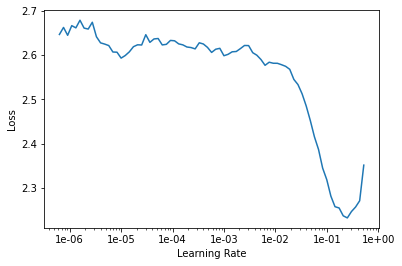

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

learn.lr_find()
learn.recorder.plot(skip_end=15)

When we call `recorder_plot`, we can see the graph with the learning rate on the x-axis and the loss on the y-axis.

The learning rate you should choose is ten times less than the lowest loss OR the learning rate where the graph is the steepest (which is what we want, we want the loss to decrease as fast as possible). 

Whenever you work with neural networks, its important to try things out and see what works better. There are two options for choosing the initial learning rate, so be sure to try both of them and see which one results in the lowest loss after training. 

###Training the neural network
We then call `fit_one_cycle` on our `learn` object to begin training (remember the `learn` object is essentially our model.) The two parameters we give the method are the number of epochs 5, which is how many times we want the model to go through the entire dataset, and the learning rate 5e-3, which is shorthand for 5 * 10^-3. 

You can also call the `fit` method, which trains your model with a constant learning rate, but we will discuss what is special about `fit_one_cycle`. 

The `fit_one_cycle` method will vary the learning rate throughout training, which the **maximum learning rate** being the parameter you gave and a **lower learning rate** which is ten times smaller than that. 

The "cycle" will begin with the lower learning rate, increase to the maximum learning rate and then decrease to a final minimum learning rate which is several ten times smaller than the maximum learning rate. 

Varying the learning rate this way, especially increasing the learning rate in the middle of training, is a **regularization method** to prevent overfitting. 


In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.605233,0.676615,00:00
1,0.618779,0.671308,00:00
2,0.595027,0.642238,00:00
3,0.540065,0.641386,00:00
4,0.496917,0.639200,00:00


###Predicting using the neural network
Now that the model finished training through 5 epochs, we can look at how accurate the model can predict given a movie. Remember that `ratings` is a panda dataframe, and we are indexing into the dataframe like an array with brackets. 

We will take the first data point in the dataset. The target value for that specific movie is given in the last line. 

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

ratings.iloc[0]
ratings.iloc[0]['rating']

3.5

In order to predict what the model will output, we call `predict` method and pass in the characteristics of the dataset. Our model is preforming well, as the prediction is close to the target value. 

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

learn.predict(ratings.iloc[0])

(FloatItem 3.5449262, tensor(3.5449), tensor(3.5449))

###Saving the model

We can save the weights to our model by calling `save` and passing in the name we want to give our model after training. 

This way, we have the option to store our weights after training and we will not have to train our model all over again. 

Because we can save the weights of our models, we can also load pre-trained models. Pre-trained models give efficiency to programmers so they do not need to train models from scratch and can instead tune these pre-trained models for other projects. 

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

learn.save('dotprod')

#Tabular data
As explained in the previous notebook, tabular data is any data which can be arranged in a table and is often data which you see in the real world (besides pictures). 

Using the `fastai.tabular` section of the `fastai` library, we will predict whether someone's salary is greater than or less than $50,000 based on their characteristics, such as their race, age, education, relationship status and more. 

The following code block will load in the data to a `Databunch`(the same from the previous notebook), and the following blocks will explain how to actually create a neural network. 

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

from fastai.tabular import *
path = untar_data(URLs.ADULT_SAMPLE)
print(path)
df = pd.read_csv(path/'adult.csv')
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status',
             'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]  

data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .databunch())
data.show_batch(rows=10)

/root/.fastai/data/adult_sample


workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,False,-0.1163,-0.2073,-0.4224,<50k
Private,Some-college,Never-married,Other-service,Not-in-family,White,False,-0.5561,0.2712,-0.0312,<50k
Private,11th,Married-civ-spouse,Craft-repair,Husband,White,False,0.7632,-1.2120,-1.2046,<50k
Private,9th,Married-civ-spouse,Transport-moving,Husband,White,False,0.1769,0.9912,-1.9869,<50k
Private,HS-grad,Separated,Adm-clerical,Unmarried,White,False,-0.7027,1.4084,-0.4224,<50k
Private,HS-grad,Never-married,Adm-clerical,Not-in-family,Other,False,-1.2158,-0.3915,-0.4224,<50k
Private,Assoc-voc,Never-married,Other-service,Own-child,White,False,-1.1425,1.5405,0.3599,<50k
Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,False,-0.1163,-1.1594,-0.4224,>=50k
Private,Some-college,Never-married,Sales,Own-child,White,False,-1.4357,0.0104,-0.0312,<50k
Private,12th,Married-civ-spouse,Craft-repair,Husband,White,False,1.8627,0.6671,-0.8135,<50k


In this panda dataframe, all the columns except the last column to the right are what will be passed into the neural network. 

The last column `target` is what our model is trying to predict, whether the person has a salary greater than (`<50k`) or less than (`>=50k`) $50,000. 

###Creating the neural network
We can create a `Learner` object called `learn` with the `tabular_learner` method. The parameters are the `data` DataBunch object, the number of neurons in each hidden layer in the `layers` parameter which is a list with the first number corresponding to the number of neurons in the first hidden layer and so on, and the `metrics` which we want to print out (we will be able to see the accuracy of how our model is predicting). 



In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

By calling `learn.model`, we can see what is actually inside our model after we define it. (expand more on embeddings later)

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
    (6): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=42, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace=True)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=2, bias=True)
  )
)

##Finding learning rate
Again, we can find the learning rate best by either choosing the learning rate with the steepest slope or ten times less than the learning rate with the lowest loss. 

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


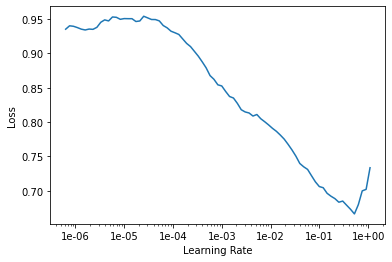

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

learn.lr_find()
learn.recorder.plot()

###Training the neural network
This time, we will be training the model by calling the `fit` method, which trains the model through 1 epoch with a constant learning rate of 1e-2. 

You can see that after training, there is another column for the `accuracy` metric.

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.357884,0.375222,0.825000,00:06


###Predicting using the neural network
Now we can try testing how well our model can predict whether someone's salary is greater than or less than $50,000. 

Remember that `df` was our pandas dataframe. We read the first datapoint in the dataset by indexing into the dataframe like an array and by calling `iloc`. 

We want our model to predict given the first datapoint, that the person makes a salary greater than $50,000 (>=50k). 

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

row = df.iloc[0]
print(row)
print("What we are trying to predict: ", row['salary'])

age                                49
workclass                     Private
fnlwgt                         101320
education                  Assoc-acdm
education-num                      12
marital-status     Married-civ-spouse
occupation                        NaN
relationship                     Wife
race                            White
sex                            Female
capital-gain                        0
capital-loss                     1902
hours-per-week                     40
native-country          United-States
salary                          >=50k
Name: 0, dtype: object
What we are trying to predict:  >=50k


Similar to how we predicted with collaborative filtering, we can use our model to predict the outcome by calling the `predict` method. We passed in the object `row`, which is the first datapoint in the pandas dataframe `df`.

The model did in fact predict that the person has a salary greater than $50,000. 

In [0]:
#CODE BELOW IS FULLY CREDITED TO FASTAI (fast.ai)
#USED ONLY FOR EDUCATIONAL PURPOSES UNDER FAIR USE

learn.predict(row)

(Category >=50k, tensor(1), tensor([0.3992, 0.6008]))